<a href="https://colab.research.google.com/github/Cycyplay/M2_DeepLearning_Classification/blob/main/DeepLearning_Projet_Classification_Version_de_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet M2 Deep Learning Classification 
## Version de Base

MURATI Vidan - VAN Cyril

Classification d'oeuvres par leur courant artistique.

## Catégories

- Impressionisme
- Surréalisme
- Cubisme
- Baroque
- Pointillisme / Divisionisme
- Pop Art
- Expressionisme
- Maniérisme
- Néo-classicisme

# Code

### SETUP : Data Initialisation (array formating)

Liste des actions à effectuer:

1. Refaire les échantillons de chaque catégorie
2. Composer les tableaux numpy x_train, y_train, x_test, y_test
3. Les permuter à l'aide de numpy.random.permutation
4. Sauvegarder les 4 tableaux mélangés deux à deux
5. Mettre x_train et x_test au bon format ?

#### Shuffle datasets

In [ ]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')

#mélange des datasets
test_permutation = np.random.permutation(len(x_test))

x_test = x_test[test_permutation]
y_test = y_test[test_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled_no_float.npy', x_test)
np.save('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy', y_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np


y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

train_permutation = np.random.RandomState(seed=42).permutation(len(y_train))

y_train = y_train[train_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy', y_train)

In [ ]:
  import numpy as np


  x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')

  train_permutation = np.random.RandomState(seed=42).permutation(len(x_train))

  x_train = x_train[train_permutation]

  np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled_no_float.npy', x_train)

#### Transform data to float32

In [ ]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled_no_float.npy')
x_test = x_test.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy', x_test)

In [ ]:
import numpy as np

x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled_no_float.npy')

x_train = x_train.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy', x_train)

## Load

In [1]:
import keras
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

Mounted at /content/drive


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(6840, 64, 64, 3)
(6840,)
(1701, 64, 64, 3)
(1701,)


## Travail sans Data Augmentation

### Modèle 1

In [ ]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_1.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dense(9, activation='softmax'))
model_1.summary()

model_1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test), shuffle=True)

In [ ]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 6ms/step - loss: 13.1166 - accuracy: 0.2499
Test accuracy: 0.24985302984714508
Test loss: 13.116606712341309


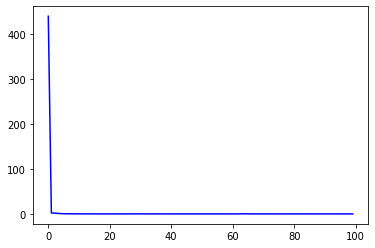

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history["loss"], "b")

### Modèle 2

In [ ]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(128, activation='relu'))
model_2.add(keras.layers.Dense(9, activation='softmax'))
model_2.summary()

model_2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test), shuffle=True)

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 4ms/step - loss: 14.9689 - accuracy: 0.3022
Test accuracy: 0.3021751940250397
Test loss: 14.96892261505127


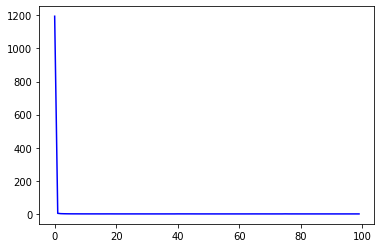

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history["loss"], "b")

### Modèle 3

In [ ]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(64, activation='relu'))
model_3.add(keras.layers.Dense(9, activation='softmax'))
model_3.summary()

model_3.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, verbose=1, batch_size=128, epochs=60, validation_data=(x_test, y_test), shuffle=True)

In [ ]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 4ms/step - loss: 13.0251 - accuracy: 0.2710
Test accuracy: 0.27101704478263855
Test loss: 13.02507495880127


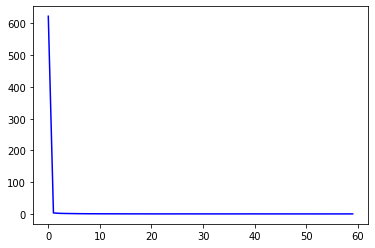

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_3.history["loss"], "b")

## Travail avec Data Augmentation

In [2]:
#Data Augmentation

data_augmentation = keras.Sequential(
    [
      keras.layers.RandomFlip("horizontal"),
      keras.layers.RandomRotation(0.1),
      keras.layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(64, 64, 3))

### Modèle 4

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_4 = keras.Model(inputs=inputs, outputs=outputs)

model_4.summary()

model_4.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

test_loss, test_accuracy = model_4.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_4.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_4.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 3ms/step - loss: 1.6330 - accuracy: 0.4780
Test accuracy: 0.4779541492462158
Test loss: 1.6329808235168457


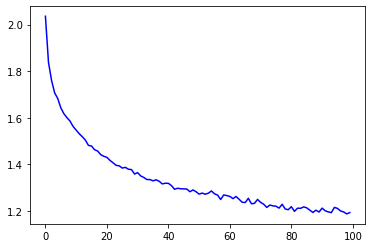

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_4.history["loss"], "b")

### Modèle 5

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3), padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(9, activation='softmax')(x)
model_5 = keras.Model(inputs=inputs, outputs=outputs)

model_5.summary()

model_5.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_5 = model_5.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

test_loss, test_accuracy = model_5.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_5.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_5.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 4ms/step - loss: 3.3699 - accuracy: 0.3698
Test accuracy: 0.3697824776172638
Test loss: 3.369896650314331


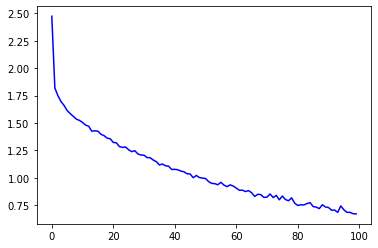

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_5.history["loss"], "b")

### Modèle 6

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_6 = keras.Model(inputs=inputs, outputs=outputs)


model_6.summary()

model_6.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_6 = model_6.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_6.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_6.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_6.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 3ms/step - loss: 1.6331 - accuracy: 0.4480
Test accuracy: 0.44797179102897644
Test loss: 1.6331396102905273


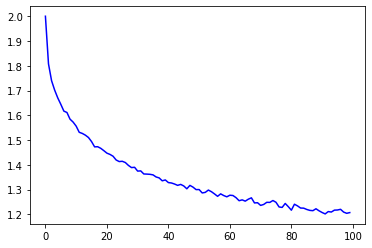

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history_6.history["loss"], "b")

### Modèle 7

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_7 = keras.Model(inputs=inputs, outputs=outputs)

model_7.summary()

model_7.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_7 = model_7.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_7.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_7.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_7.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 4ms/step - loss: 1.8162 - accuracy: 0.3898
Test accuracy: 0.3897707164287567
Test loss: 1.8161979913711548


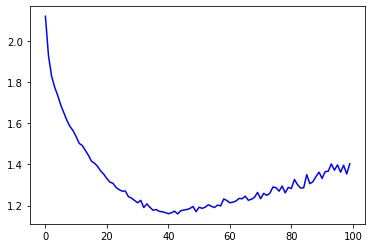

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_7.history["loss"], "b")

### Modèle 8

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_8 = keras.Model(inputs=inputs, outputs=outputs)

model_8.summary()

model_8.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_8 = model_8.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_8.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_8.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_8.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 4ms/step - loss: 2.6481 - accuracy: 0.4098
Test accuracy: 0.40975895524024963
Test loss: 2.648073196411133


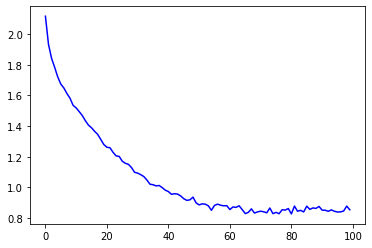

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history_8.history["loss"], "b")

### Modèle 9

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_9 = keras.Model(inputs=inputs, outputs=outputs)

model_9.summary()

model_9.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_9 = model_9.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_9.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_9.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_9.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))


54/54 [==============================] - 0s 3ms/step - loss: 1.6358 - accuracy: 0.4733
Test accuracy: 0.47325101494789124
Test loss: 1.6357707977294922


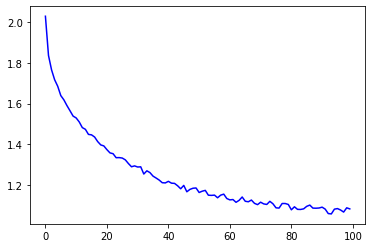

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_9.history["loss"], "b")

### Modèle 10

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_10 = keras.Model(inputs=inputs, outputs=outputs)

model_10.summary()

model_10.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_10 = model_10.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_10.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_10.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_10.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 3s 46ms/step - loss: 2.5168 - accuracy: 0.4180
Test accuracy: 0.41798943281173706
Test loss: 2.5167644023895264


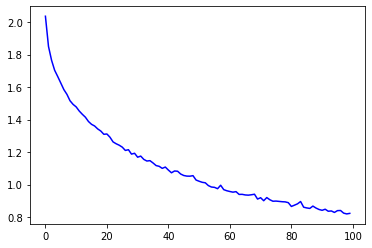

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_10.history["loss"], "b")

### Modèle 11

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same')(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(9, activation='softmax')(x)

model_11 = keras.Model(inputs=inputs, outputs=outputs)

model_11.summary()

model_11.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_11 = model_11.fit(x_train, y_train, verbose=1, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_11.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_11.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_11.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 3.9400 - accuracy: 0.4080
Test accuracy: 0.4079952836036682
Test loss: 3.9400100708007812


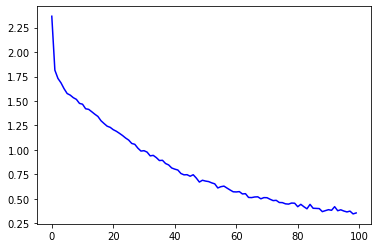

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_11.history["loss"], "b")

### Modèle 12

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same')(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(9, activation='softmax')(x)

model_12 = keras.Model(inputs=inputs, outputs=outputs)

model_12.summary()

model_12.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_12 = model_12.fit(x_train, y_train, verbose=1, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_12.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_12.history["loss"], "b")

In [ ]:
test_loss, test_accuracy = model_12.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 3.6409 - accuracy: 0.3980
Test accuracy: 0.39800116419792175
Test loss: 3.640939235687256


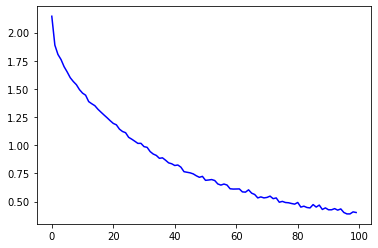

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_12.history["loss"], "b")

### Modèle 13

In [ ]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3), activation="relu")(x)
x = keras.layers.Conv2D(32, (3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu")(x)
x = keras.layers.Conv2D(64, (3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="softmax")(x)

model_13 = keras.Model(inputs=inputs, outputs=outputs)

model_13.summary()

model_13.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_13 = model_13.fit(x_train, y_train, verbose=1, epochs=100, validation_data=(x_test, y_test), shuffle=True)

test_loss, test_accuracy = model_13.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_13.history["loss"], "b")

In [7]:
test_loss, test_accuracy = model_13.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))


54/54 [==============================] - 0s 6ms/step - loss: 2.0716 - accuracy: 0.4609
Test accuracy: 0.4609053432941437
Test loss: 2.0716123580932617


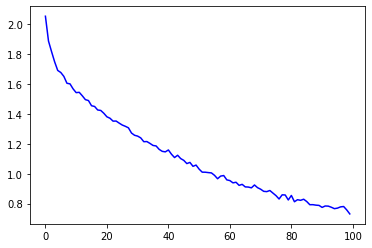

In [8]:
import matplotlib.pyplot as plt
plt.plot(history_13.history["loss"], "b")

## Tests


L'image est du courant: Baroque

----------- Analyse par le modèle -----------

1/1 [==============================] - 0s 21ms/step
[1.2814739e-03 8.1867985e-11 8.8625612e-08 9.9860185e-01 1.9719359e-06
 1.1101465e-04 7.5010703e-08 2.3728447e-10 3.4891673e-06]
[3 0 5]
Courant artistique Top 1 Baroque - Likelihood: 0.998602
Courant artistique Top 2 Impressionisme - Likelihood: 0.001281
Courant artistique Top 3 Pop Art - Likelihood: 0.000111


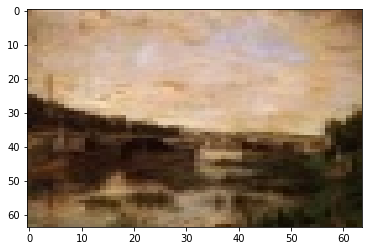

In [48]:
import keras
import numpy as np
import random as rd

from matplotlib import pyplot as plt
import cv2

## PENSER à sauvegarder un modèle sympa pour le tester

class_labels = [
    "Impressionisme",
    "Surréalisme",
    "Cubisme",
    "Baroque",
    "Divisionisme",
    "Pop Art",
    "Expressionisme",
    "Maniérisme",
    "Néo-classicisme"
]

value = rd.randint(0, len(x_test))
plt.imshow(x_test[value], interpolation='nearest', aspect='auto')

print("\nL'image est du courant: " + class_labels[y_test[value]])


print("\n----------- Analyse par le modèle -----------\n")
image_to_test = keras.utils.img_to_array(x_test[value])
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)
# Make a prediction using the model
results = model_13.predict(list_of_images)
# Since we are only testing one image, we only need to check the first result
single_result = results[0]
print(single_result)
# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
top_3_classes = np.argsort(-single_result)[:3]
print(top_3_classes)
# Print the result
print("Courant artistique Top 1 {} - Likelihood: {:2f}".format(class_labels[top_3_classes[0]], single_result[top_3_classes[0]]))
print("Courant artistique Top 2 {} - Likelihood: {:2f}".format(class_labels[top_3_classes[1]], single_result[top_3_classes[1]]))
print("Courant artistique Top 3 {} - Likelihood: {:2f}".format(class_labels[top_3_classes[2]], single_result[top_3_classes[2]]))